In [1]:
import sys
sys.path.insert(0,'../')
from myenvs import gridworld
from solvers import mc
import numpy as np
from collections import defaultdict

env = gridworld.DetermGridWorld(size=[4,4],plotgrid=False)
env.reset()
def optimal_policy(state):
    policy = [0, 3, 3, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 2, 2, 0]
    action = policy[state]
    return action
def random_policy(state):
    action = np.random.choice(np.arange(0,env.nA), 1)[0]
    return action


In [2]:
from solvers import td
TD = td.TD(env,random_policy,num_episodes=10)
episode = TD._collect_samples()
V0 = defaultdict(float)
Gt2 = TD._compute_nstep_return(episode[0],V0,n=2)
Gtl = TD._compute_lambda_return(episode[0],V0)
E = TD._compute_eligibility_trace(episode[0])

In [3]:
FV = TD.forward_view()
TD0 = TD.tdn(n=0)
BV = TD.backward_view(n=0)

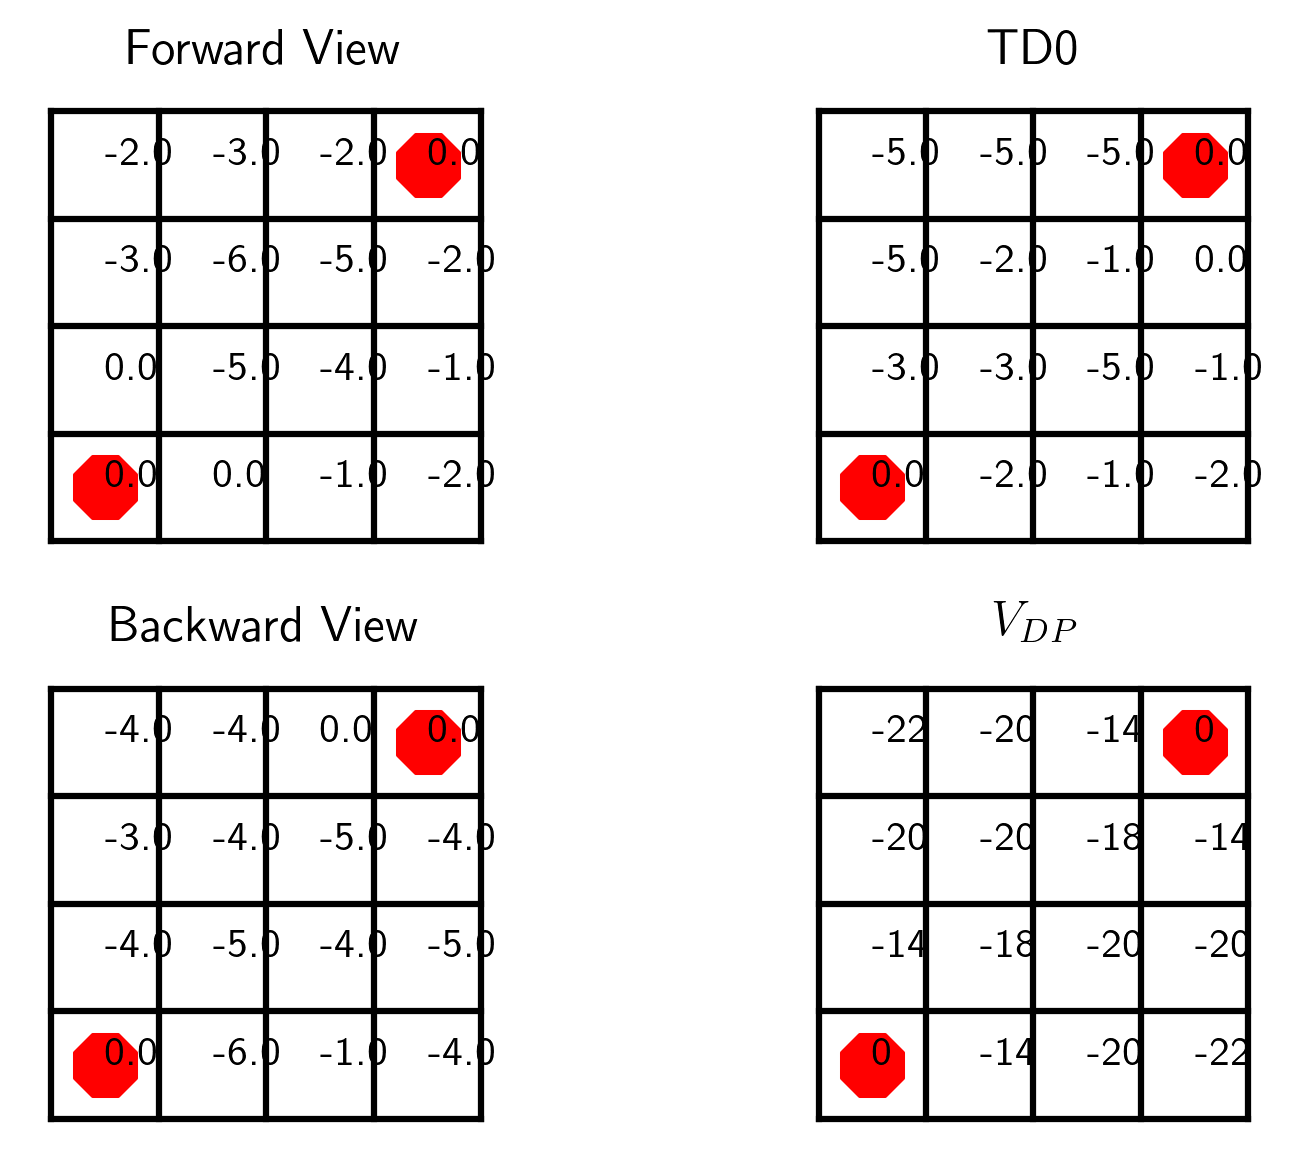

In [4]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import rc
rc('text', usetex=True)
mpl.rcParams['figure.dpi']=300

    
ax = plt.subplot(221)
env._plotenv()
for ind, state in enumerate(env.flatgrid):
    ax.text(state[0],state[1],str(FV[ind]))
plt.title('Forward View')

ax = plt.subplot(222)
env._plotenv()
for ind, state in enumerate(env.flatgrid):
    ax.text(state[0],state[1],str(TD0[ind]))
plt.title('TD0')

ax = plt.subplot(223)
env._plotenv()
for ind, state in enumerate(env.flatgrid):
    ax.text(state[0],state[1],str(BV[ind]))
plt.title('Backward View')

expected_v = [0, -14, -20, -22, -14, -18, -20, -20, -20, -20, -18, -14, -22, -20, -14, 0]
ax = plt.subplot(224)
env._plotenv()
for ind, state in enumerate(env.flatgrid):
    ax.text(state[0],state[1],str(expected_v[ind]))
plt.title(r'$V_{DP}$')

plt.tight_layout()
plt.show()